# ARIMA Models

## 1. Stationarity and Differencing

### Stationarity (정상성)

- If $\{y_t\}$ is a stationary time series, then for all s, the distribution of $\{y_t, y_{t+1}, \cdots ,y_{t+s}\}$ does not depend on t.

- Time series with trends, or with seasonality are not stationary

- A white noise series is stationary

#### Identifying non-stationary in time series

- Autocorrelation coefficients (자기상관계수)

    - Autocorrelation measures the linear relationship between lagged values of a time series.

    - $r_1$ measures the relationship between $y_t$ and $y_{t-1}$ 

    - $r_2$ measures the relationship between $y_t$ and $y_{t-2}$

$$
r_k = \frac{\sum_{t=k+1}^{T} (y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T} (y_t - \bar{y})^2}
$$

### (1) ACF (Autocorrelation function) Plot 

- The ACF of stationary data drops to zero relatively quickly.

- The ACF of non-stationary data decreases slowly.

- For non-stationary data, the value of $r_1$ is often large and positive.

<Axes: xlabel='Month'>

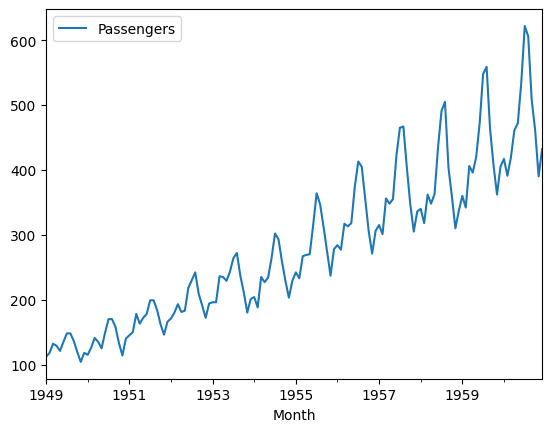

In [1]:
import pandas as pd

df = pd.read_csv('../data/air_passengers.csv')
df.set_index('Month', inplace=True)
df.index = pd.to_datetime(df.index)

# drop null values
df.dropna(inplace=True)

df.plot()

In [2]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


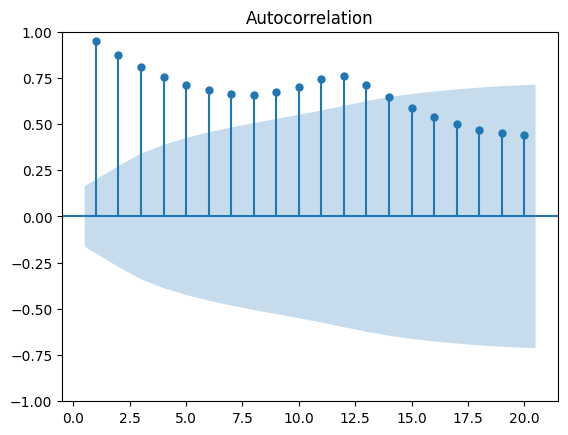

In [3]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=20, zero=False);

### Differencing (차분)

- Differencing is computing the differences between consecutive observations.
$$
y_t'=y_t-y_{t-1}
$$ 

- The differenced series will have only $T - 1$ values since it is not possible to calculate a difference for the first observation.

- Transformations such as logarithms can help to stabilize the variance of a time series.

- Differencing can help stabilize the mean of a time series by removing changes in the level of a time series.

### (2) Log transformation to stabilize varaince

<Axes: xlabel='Month'>

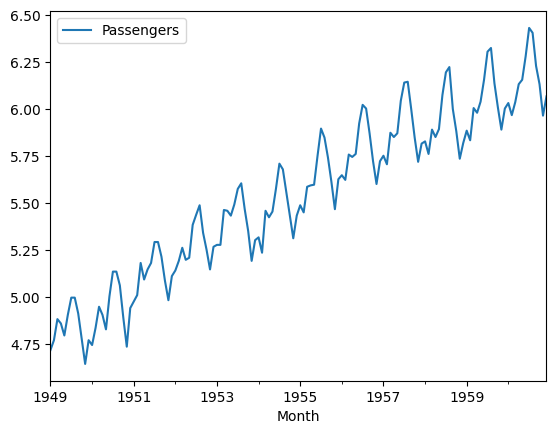

In [4]:
import numpy as np

df_log = np.log(df)
df_log.plot()

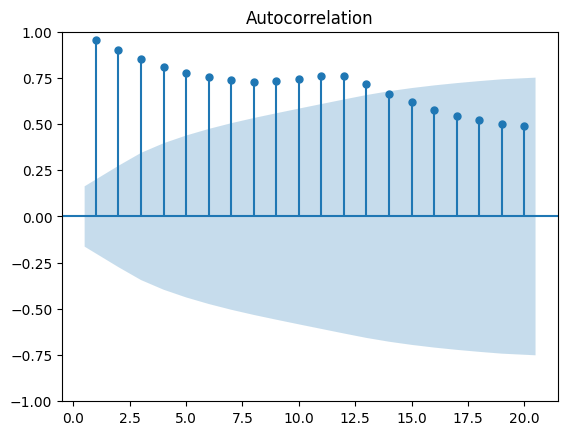

In [5]:
sm.graphics.tsa.plot_acf(df_log.dropna().values.squeeze(), lags=20, zero=False);

### (3) Seasonal Differencing to stabilize mean

- A seasonal difference is the difference between an observation and the corresponding observation from the previous year.
$$
\begin{aligned}
y_t' &= y_t - y_{t-m} \\
m\ &= \text{number of seasons}
\end{aligned}
$$

- Seasonally difference series will have $T - m$ obs.

- If seasonally differenced data appear to be white noise, then an appropriate model for the original data is
$$
y_t = y_{t-m} + \epsilon_t
$$

<Axes: xlabel='Month'>

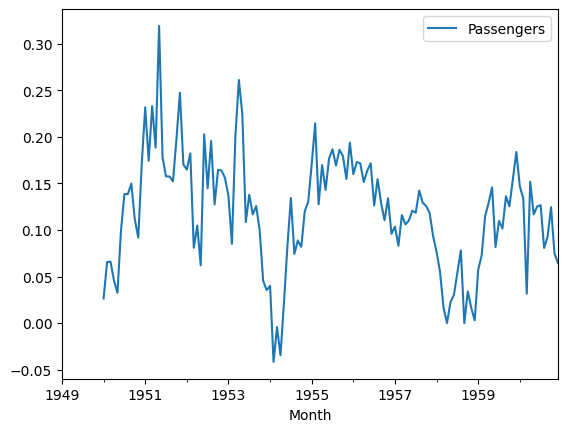

In [6]:
df_transformed = df_log.diff(12)
df_transformed.dropna()
df_transformed.plot()

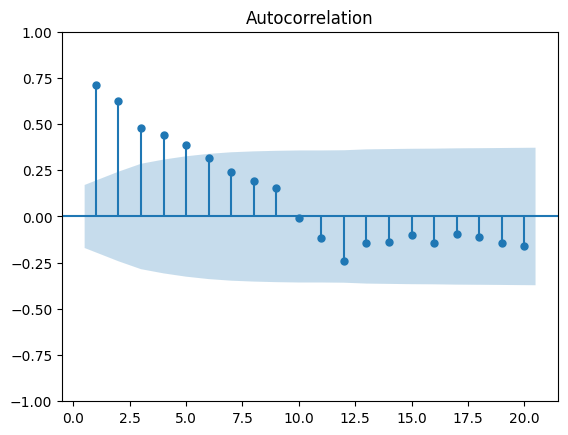

In [7]:
sm.graphics.tsa.plot_acf(df_transformed.dropna().values.squeeze(), lags=20, zero=False);

### (4) First-order Differencing

- Seasonally differenced series is closer to being stationary.

- Remaining non-stationarity can be removed with further difference.

- If $y_t' = y_t - y_{t-m}$ denotes seasonally differenced series, then twice-differenced series is

$$
\begin{aligned}
y_t^* &= y_t' - y_{t-1}' \\
      &= (y_t - y_{t-m}) - (y_{t-1} - y_{t-m-1}) \\
      &= y_t - y_{t-1} - y_{t-m} - y_{t-m-1} \\
\end{aligned}
$$

- It makes no difference which is done first : seasonal vs first-order

- If seasonality is strong, we recommend that seasonal differencing be done first because sometimes the resulting series will be stationary and there will be no need for further first difference.

In [8]:
df_final = df_transformed.diff()
df_final = df_final.dropna()

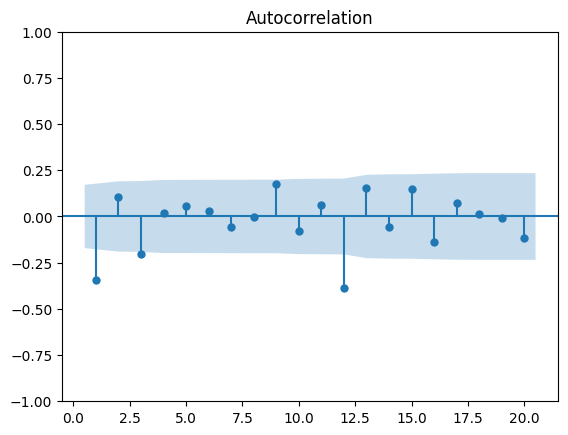

In [9]:
sm.graphics.tsa.plot_acf(df_final.values.squeeze(), lags=20, zero=False);

### (5) ADF Test to assess whether or not a time-series is stationary

In [10]:
from statsmodels.tsa.stattools import adfuller

#Original
print("Original Data")
dftest = adfuller(df.Passengers, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

#df_log 
print("Log Transformed")
dftest = adfuller(df_log.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

#log+differencing    
print("Log + Differencing")
dftest = adfuller(df_final, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

Original Data
Test statistic = 0.815
P-value = 0.992
Critical values :
	1%: -3.4816817173418295 - The data is not stationary with 99% confidence
	5%: -2.8840418343195267 - The data is not stationary with 95% confidence
	10%: -2.578770059171598 - The data is not stationary with 90% confidence
Log Transformed
Test statistic = -1.717
P-value = 0.422
Critical values :
	1%: -3.4816817173418295 - The data is not stationary with 99% confidence
	5%: -2.8840418343195267 - The data is not stationary with 95% confidence
	10%: -2.578770059171598 - The data is not stationary with 90% confidence
Log + Differencing
Test statistic = -4.443
P-value = 0.000
Critical values :
	1%: -3.4870216863700767 - The data is  stationary with 99% confidence
	5%: -2.8863625166643136 - The data is  stationary with 95% confidence
	10%: -2.580009026141913 - The data is  stationary with 90% confidence


## 2. Random Walk Model

- The differenced series is the change between consecutive observations in the original series, and can be written as
$$
y_t' = y_t - y_{t-1}
$$

- When the differenced series is white noise,
$$
y_t - y_{t-1} = \epsilon_t
$$

- We regard the original model as a "random walk" model

- Random walks typically have:
    - Long periods of apparent trends up or down.
    - Sudden and unpredictable changes in direction.

In [11]:
y_1 = 1
random_walk = []
random_walk.append(y_1)
for i in range(0, 100):
    # np.random.normal(0, 1, 1)[0] -> 평균 0, 표준편차 1인 정규분포에서 무작위값 하나를 생성
    random_walk.append(random_walk[-1] + np.random.normal(0, 1, 1)[0])

Text(0.5, 1.0, 'Random Walk')

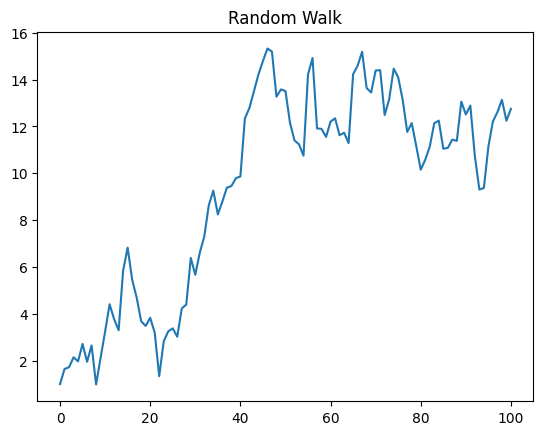

In [12]:
import matplotlib.pyplot as plt

plt.plot(random_walk)
plt.title('Random Walk')

### Random Walk Model with draft

- A closely related model allows the differences to have a non zero-mean
$$
\begin{aligned}
& y_t - y_{t-1} = c + \epsilon_t \quad or\\
& y_t = c + y_{t-1} + \epsilon_t
\end{aligned}
$$

- $y_t$ will tend to drift upwards. However, if c is negative, $y_t$ will tend to drift downwards.

In [13]:
y_1 = 1
random_walk=[]
random_walk.append(y_1)
for i in range(0,100):
    random_walk.append(0.1 + random_walk[-1] + np.random.normal(0, 1, 1)[0])

Text(0.5, 1.0, 'Random Walk with drift')

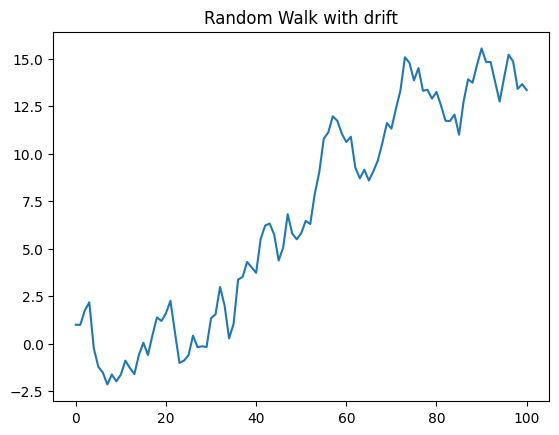

In [14]:
plt.plot(random_walk)
plt.title("Random Walk with drift")

## 3. AR Model

### Autoregressive Models - AR(p)

$$
y_t = c + \phi_1y_{t-1} + \phi_2y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t
$$

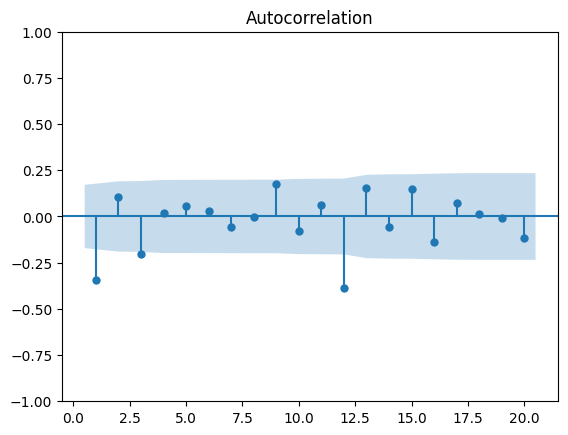

In [15]:
sm.graphics.tsa.plot_acf(df_final.values.squeeze(), lags=20, zero=False);

### (1) Use AR(1) Model

$$
y_t = \phi_1 y_{t-1} + \epsilon_t
$$  

- When $\phi_1 = 0$, $y_t$ is equivalent to white noise.

- When $\phi_1 = 1$, $y_t$ is equivalent to random walk.

- When $\phi_1 < 0$, $y_t$ tends to oscillate arround the mean.

- We require $|\phi_1| < 1$ for stationarity. The closer $\phi_1$ is to the bounds the more the process wnaders above or below its unconditional mean.

#### AR(1) model with constant

$$
y_t = c + \phi_1 y_{t-1} + \epsilon_t
$$  

- $c$ is related to the mean of $y_t$
- Let $E(y_t) = \mu$
- $\mu = \frac{c}{1-\phi_1}$
- General: $\mu = \frac{c}{1 - \phi_1 - \phi_2 - \cdots - \phi_p}$

- AR(1)
$$
\begin{aligned}
y_t &= c + \phi_1y_{t-1} + \epsilon_t \quad \epsilon_t \sim N(0, \sigma^2) \\
E(y_t) &= E(c + \phi_1 y_{t-1} + \epsilon_t) \\
\mu &= c + \phi_1 \mu \\
\mu &= \frac{c}{1 - \phi_1}
\end{aligned}
$$

- AR(p)
$$
\begin{aligned}
y_t &= c + \phi_1y_{t-1} + \phi_2y_{t-2} + \cdots + \phi_py_{t-p} + \epsilon_t \\
E(y_t) &= E(c + \phi_1y_{t-1} + \phi_2y_{t-2} + \cdots + \phi_py_{t-p} + \epsilon_t) \\
\mu &= c + \phi_1\mu + \phi_2\mu + \cdots + \phi_p\mu \\
\mu &= \frac{c}{1 - \phi_1 - \phi_2 - \cdots - \phi_p}
\end{aligned}
$$

#### AR Parameter Estimation

- Consider the mean-centered AR(1) model: 
$$
y_t - \mu = \phi(y_{t-1} - \mu) + \epsilon_t
$$

- The least squares method:
$$
S_c(\phi, \mu) = \sum_{t=2}^{n}[(y_t - \mu) - \phi(y_{t-1} - \mu)]^2
$$ 

- $S_c(\phi, \mu)$ 함수를 $\mu$에 대해 미분하여 이를 최소화하는 $\mu$의 값을 구한다.

$$
\begin{aligned}
& 2 \sum_{t=2}^{n}[(y_t - \mu) - \phi(y_{t-1} - \mu)] (\phi - 1) = 0 \\
& (\phi - 1)\sum_{t=2}^{n}y_t - (\phi - 1)\sum_{t=2}^{n}\mu - \phi(\phi - 1)\sum_{t=2}^{n}y_{t-1} + \phi(\phi - 1)\sum_{t=2}^{n}\mu = 0 \\
& \sum_{t=2}^{n}y_t - (n-1)\mu - \phi\sum_{t=2}^{n}y_{t-1} + \phi(n-1)\mu = 0 \\
& \sum_{t=2}^{n}y_t - \phi\sum_{t=2}^{n}y_{t-1} = (n - 1)\mu(1 - \phi) \\
& \mu = \frac{1}{(n - 1)(1 - \phi)} (\sum_{t=2}^{n}y_t - \phi\sum_{t=2}^{n}y_{t-1}) \\
& \therefore \hat{\mu} = \frac{1}{(n - 1)(1 - \phi)} (\sum_{t=2}^{n}y_t - \phi\sum_{t=2}^{n}y_{t-1}) \\
& \hat{\mu} = \frac{1}{(n - 1)} \sum_{t=2}^ny_t \qquad \because \sum_{t=2}^ny_t \approx \sum_{t=2}^ny_{t-1} \quad (\text{n이 클수록})
\end{aligned}
$$

- For large n, $\hat{\mu} \approx \bar{Y}$, regardless of the value of $\phi$.

- $S_c(\phi, \mu)$ 함수를 $\phi$에 대해 미분하여 이를 최소화하는 $\phi$의 값을 구한다.

$$
\begin{aligned}
& -2 \sum_{t=2}^{n}[(y_t - \mu) - \phi(y_{t-1} - \mu)] (y_{t-1} - \mu) = 0 \\
& \sum_{t=2}^{n}(y_t - \mu)(y_{t-1} - \mu) - \phi\sum_{t=2}^{n}(y_{t-1} - \mu)^2 = 0 \\
& \phi = \frac{\sum_{t=2}^{n}(y_t - \mu)(y_{t-1} - \mu)}{\sum_{t=2}^{n}(y_{t-1} - \mu)^2} \\
& \therefore \hat{\phi} = \frac{\sum_{t=2}^{n}(y_t - \mu)(y_{t-1} - \mu)}{\sum_{t=2}^{n}(y_{t-1} - \mu)^2} 
\end{aligned}
$$

- n이 클수록, $\hat{\phi} \approx \frac{\sum_{t=2}^{n}(y_t - \bar{y})(y_{t-1} - \bar{y})}{\sum_{t=2}^{n}(y_{t-1} - \bar{y})^2}$이다.

In [16]:
from statsmodels.tsa.arima.model import ARIMA

train_data = np.log(df.Passengers[:110])
test_data = np.log(df.Passengers[110:])
AR_model = ARIMA(train_data, order=(1, 1, 0))
res = AR_model.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  110
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  94.134
Date:                Wed, 23 Apr 2025   AIC                           -184.267
Time:                        18:39:33   BIC                           -178.884
Sample:                    01-01-1949   HQIC                          -182.084
                         - 02-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1777      0.104      1.715      0.086      -0.025       0.381
sigma2         0.0104      0.002      5.288      0.000       0.007       0.014
Ljung-Box (L1) (Q):                   0.09   Jarque-

c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
res.params

ar.L1     0.177720
sigma2    0.010405
dtype: float64

In [18]:
train_data

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1957-10-01    5.849325
1957-11-01    5.720312
1957-12-01    5.817111
1958-01-01    5.828946
1958-02-01    5.762051
Name: Passengers, Length: 110, dtype: float64

Text(0.5, 1.0, 'Predictions: Train Set')

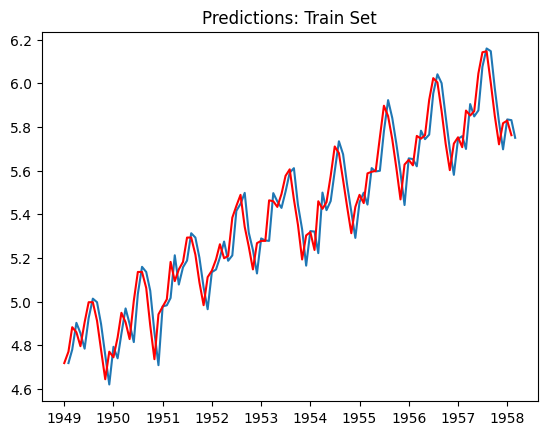

In [19]:
plt.plot(res.predict(start=1, end=len(train_data), dynamic=False))
plt.plot(train_data, color='red')
plt.title('Predictions: Train Set')

In [20]:
res.predict(start=1,end=len(train_data),dynamic=False)

1949-02-01    4.718499
1949-03-01    4.779959
1949-04-01    4.902727
1949-05-01    4.855727
1949-06-01    4.784413
                ...   
1957-11-01    5.822295
1957-12-01    5.697384
1958-01-01    5.834314
1958-02-01    5.831049
1958-03-01    5.750163
Freq: MS, Name: predicted_mean, Length: 110, dtype: float64

### (2) Residual Plot

Text(0.5, 1.0, 'Residual Plot')

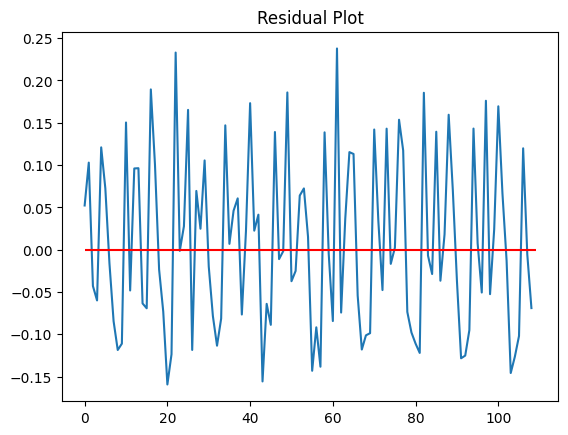

In [21]:
plt.plot(res.resid.values[1:])
plt.hlines(0, xmin=0, xmax=len(res.resid.values[1:]), color='red')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Predictions: Test Set')

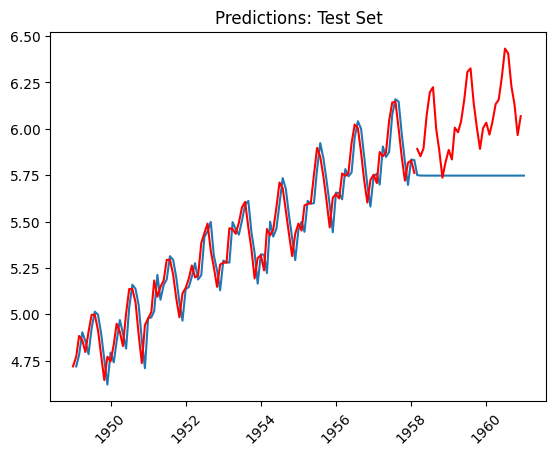

In [22]:
pred_ar = res.predict(start=1, end=len(train_data) + len(test_data), dynamic=False)
plt.plot(pred_ar)
plt.plot(train_data, color='red')
plt.plot(test_data, color='red')
plt.xticks(rotation=45)
plt.title('Predictions: Test Set')

### (3) Rolling window forecast

In [23]:
predictions = pd.Series()
history = [x for x in train_data]
for t in range(len(test_data)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions = pd.concat([predictions, pd.Series({test_data.index[t] : yhat})])
    obs = test_data[t]
    history.append(obs)

(array([-4263., -4140., -4018., -3898., -3775., -3653., -3532., -3409.,
        -3287.]),
 [Text(-4263.0, 0, '1958-05'),
  Text(-4140.0, 0, '1958-09'),
  Text(-4018.0, 0, '1959-01'),
  Text(-3898.0, 0, '1959-05'),
  Text(-3775.0, 0, '1959-09'),
  Text(-3653.0, 0, '1960-01'),
  Text(-3532.0, 0, '1960-05'),
  Text(-3409.0, 0, '1960-09'),
  Text(-3287.0, 0, '1961-01')])

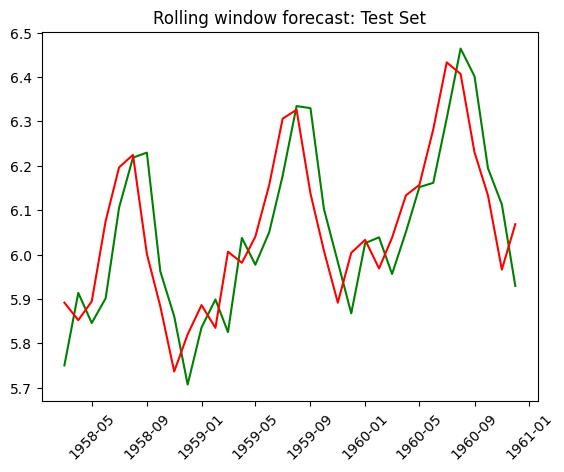

In [24]:
plt.plot(predictions, color='green')
plt.plot(test_data, color='red')
plt.title('Rolling window forecast: Test Set')
plt.xticks(rotation=45)

### (4) Putting it all together

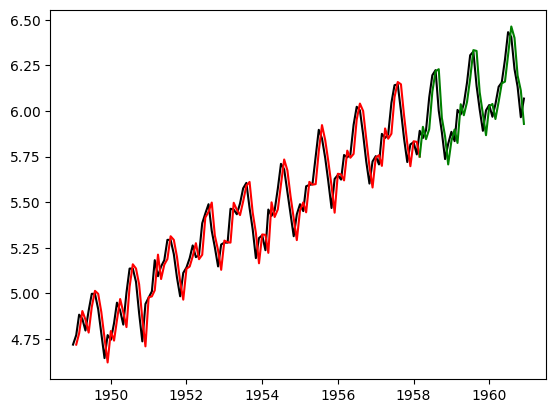

In [25]:
plt.plot(np.log(df.Passengers), color='black')
fitted_ar = res.predict(start=1, end=len(train_data), dynamic=False)
plt.plot(fitted_ar, color='red')
plt.plot(predictions, color='green')

## 4. MA Model
$$
y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

- It is possible to write any stationary AR(p) process as an MA($\infty$) process.
$$
\begin{aligned}
y_t &= \phi_1 y_{t-1} + \epsilon_t \\
    &= \phi_1(\phi_1 y_{t-2} + \epsilon_{t-1}) + \epsilon_t \\
    &= \phi_1^2y_{t-2} + \phi_1\epsilon_{t-1} + \epsilon_t \\
    &= \phi_1^2(\phi_1y_{t-3} + \epsilon_{t-2}) + \phi_1\epsilon_{t-1} + \epsilon_t \\
    &= \phi_1^3y_{t-3} + \phi_1^2\epsilon_{t-2} + \phi_1\epsilon_{t-1} + \epsilon_t \\
    \vdots \\
    &= \phi_1^ky_{t-k} + \phi_1^{t-1}\epsilon_{t-k+1} + \cdots + \epsilon_t 
\end{aligned}
$$

- $|\phi_1| < 1$이고 $k \to \infty$이면 $\phi_1^k y_{t-k}$는 0이 된다.

- Any MA(q) process can be written as AR($\infty$) process if we impose some constraints on the MA parameters.

- Then the MA model is called "invertible."

- MA(1) process: $y_t = \epsilon_t + \theta_1 \epsilon_{t-1}$

$$
\begin{aligned}
\epsilon_t &= y_t - \theta_1\epsilon_{t-1} \\
           &= y_t - \theta_1(y_{t-1} - \theta_1\epsilon_{t-2}) \\
           &= y_t - \theta_1y_{t-1} + \theta_1^2\epsilon_{t-2} \\
           &= = y_t - \theta_1y_{t-1} + \theta_1^2(y_{t-2} - \theta_1\epsilon_{t-3}) \\
           &= y_t - \theta_1y_{t-1} + \theta_1^2y_{t-2} - \theta_1^3\epsilon_{t-3} \\
           \vdots \\
           &= y_t - \theta_1y_{t-1} + \theta^2y_{t-2} + \cdots + (-\theta_1)^ky_{t-k} + (-\theta_1)^{k+1}\epsilon_{t-k-1} \\
\end{aligned}
$$

- $|\theta_1| < 1$이고 $k \to \infty$이면 $(-\theta_1)^{k+1}\epsilon_{t-k-1}$은 0으로 수렴한다

### 4-1. Use MA(1) Model

In [26]:
MA_model = ARIMA(train_data, order=(0, 1, 1))

c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
res = MA_model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  110
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  94.994
Date:                Wed, 23 Apr 2025   AIC                           -185.987
Time:                        18:39:34   BIC                           -180.605
Sample:                    01-01-1949   HQIC                          -183.804
                         - 02-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2653      0.119      2.234      0.026       0.033       0.498
sigma2         0.0102      0.002      5.590      0.000       0.007       0.014
Ljung-Box (L1) (Q):                   0.22   Jarque-

Text(0.5, 1.0, 'Predictions: Train Set')

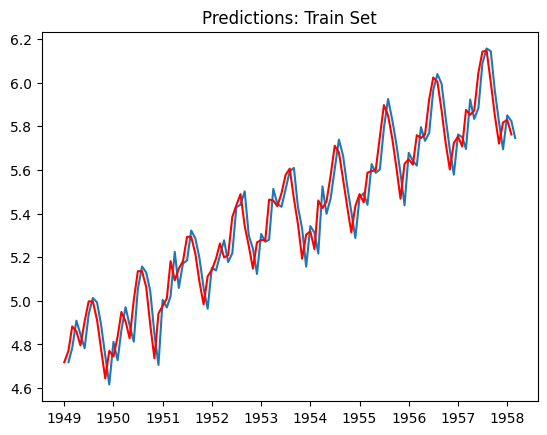

In [28]:
plt.plot(res.predict(start=1, end=len(train_data), dynamic=False))
plt.plot(train_data, color='red')
plt.title('Predictions: Train Set')

### 4-2. Residual Plot

Text(0.5, 1.0, 'Residual Plot')

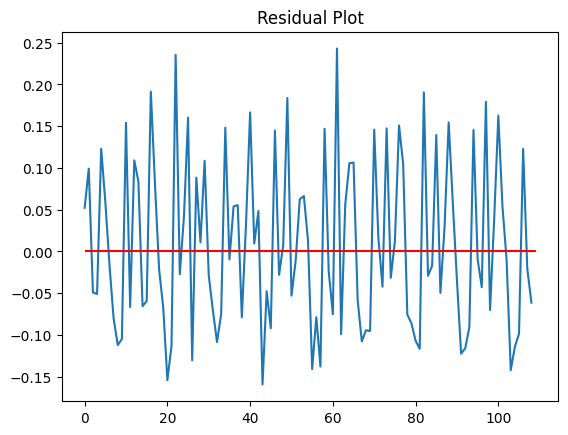

In [29]:
plt.plot(res.resid.values[1:])
plt.hlines(0, xmin=0, xmax=len(res.resid.values[1:]), color='red')
plt.title('Residual Plot')

Text(0.5, 1.0, 'Predictions: Test Set')

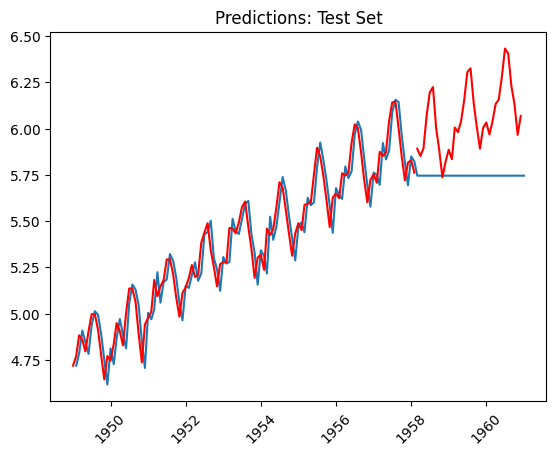

In [30]:
pred_ma = res.predict(start=1,end=len(train_data) + len(test_data), dynamic=False)
plt.plot(pred_ma)
plt.plot(train_data,color='red')
plt.plot(test_data,color='red')
plt.xticks(rotation=45)
plt.title("Predictions: Test Set")

### 4-3. Rolling window forecast

In [31]:
predictions = pd.Series()
history = [x for x in train_data]
for t in range(len(test_data)):
    model = ARIMA(history, order=(0, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions=pd.concat([predictions,pd.Series({test_data.index[t]:yhat})])
    obs = test_data[t]
    history.append(obs)

c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(array([-4263., -4140., -4018., -3898., -3775., -3653., -3532., -3409.,
        -3287.]),
 [Text(-4263.0, 0, '1958-05'),
  Text(-4140.0, 0, '1958-09'),
  Text(-4018.0, 0, '1959-01'),
  Text(-3898.0, 0, '1959-05'),
  Text(-3775.0, 0, '1959-09'),
  Text(-3653.0, 0, '1960-01'),
  Text(-3532.0, 0, '1960-05'),
  Text(-3409.0, 0, '1960-09'),
  Text(-3287.0, 0, '1961-01')])

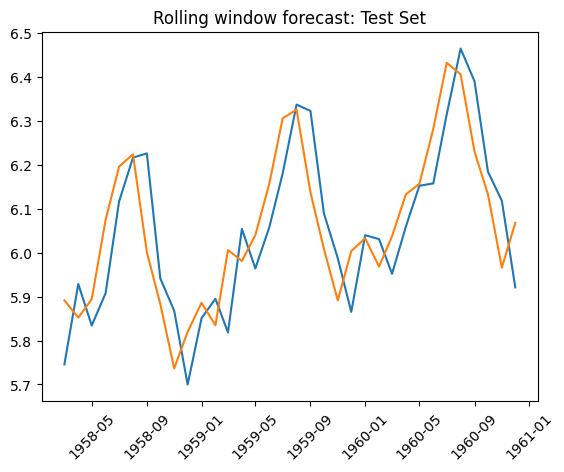

In [32]:
plt.plot(predictions)
plt.plot(test_data)
plt.title("Rolling window forecast: Test Set")
plt.xticks(rotation=45)

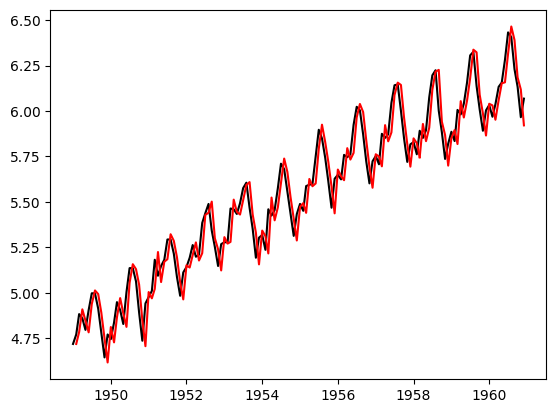

In [33]:
plt.plot(np.log(df.Passengers),color='black')
fitted_ma= res.predict(start=1,end=len(train_data),dynamic=False)
plt.plot(fitted_ma,color='red')
plt.plot(predictions,color='red')

---

## ARIMA (p, d, q) Model

- p: order of the autoregressive part

- d: degree of differencing involved

- q: order of the moving average part

- ARIMA (2, 1, 2)
$$ y_t' = c + \phi_1 y_{t-1}' + \phi_2 y_{t-2}' + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \epsilon_t $$

## ACF and PACF Plots

- It is sometimes possible to use the ACF plot, and the closely related PACF plot, to determine appropriate values for p and q.

- ACF: correlation between $y_t$ and $y_{t-k}$
    - If $y_t$ and $y_{t-1}$ are correlated, then $y_{t-1}$ and $y_{t-2}$ must be also correlated.

    - $y_t$ and $y_{t-2}$ might be correlated, simply becasue they are both connected to $y_{t-1}$.

### PACF (Partial Autocorrelations)

- Measure the relationship between $y_t$ and $y_{t-k}$ after removing the effects of lags 1, 2, 3, $\cdots$, k-1.

- Each partial autocorrelation can be estimated as the last coefficient in an autoregressive model.

- $a_{k,k}$ the kth partial autocorrelation coefficient is equal to the estimate of $\phi_k$ in an AR(k) model.

$$  \alpha_{n,n} = \frac{\rho(n) - \sum_{k=1}^{n-1} \alpha_{n-1,k} \rho(n-k)}{1 - \sum_{k=1}^{n-1} \alpha_{n-1,k} \rho(k)} $$ 
$$ \text{where } \alpha_{n,k} = \alpha_{n-1,k} - \alpha_{n,n} \alpha_{n-1,n-k}, \quad \text{for } 1 \leq k \leq n-1 \quad
\text{and } \rho(n) \text{ is the autocorrelation function.} $$ 

## ACF and PACF Interpretation

### AR(1) model

- Recall: $\rho_k = \frac{\sum_{t=k+1}^{T}(y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T}(y_t - \bar{y})^2}$ (ACF)

- $\rho_k = \phi_1^k$

- $\alpha_1 = \phi_1, \quad \alpha_k = 0 \text{ for } k = 2,3, \cdots$ (PACF)

- $\rho_k$ 유도 과정

$$\rho_k = \frac{\sum_{t=k+1}^{T}(y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T}(y_t - \bar{y})^2} 
\approx \frac{Cov(y_t, y_{t-k})}{Var(y_t)}$$

$$
\begin{aligned}
Cov(y_t, y_{t-1}) &= E[y_t y_{t-k}] - E[y_t]E[y_{t-k}] \\
                  &= E[y_t y_{t-k}] \quad \because E[y_t] = E[y_{t-k}] = 0
\end{aligned}
$$

$$ y_t = \phi_1 y_{t-1} + \epsilon_t $$ 

$$ y_t y_{t-k} = \phi_1 y_{t-1} y_{t-k} + \epsilon_t y_{t-k} $$

$$ E[y_t y_{t-k}] = \phi_1 E[y_{t-1} y_{t-k}] + E[\epsilon_t y_{t-k}] $$

$$ 
\begin{aligned}
Cov(y_t, y_{t-k}) = \phi_1 Cov(y_{t-1}, y_{t-k}) &\because Cov(y_t, y_{t-k}) = E[y_t y_{t-k}] - E[y_t] E[y_{t-k}] \\
                                                 &\because E[y_t] = E[y_{t-k}] = E[\epsilon_t] = 0 \\
                                                 &\because \epsilon_t\text{와 } y_{t-k}\text{는 서로 독립}
\end{aligned}
$$

$$ \gamma_k = \phi_1 \gamma_{k-1} \quad \because Cov(y_t, y_{t-k}) = \gamma_k $$

$$ \gamma_k = \phi_1 \gamma_{k-1} = \phi_1^2 \gamma {k-2} = \cdots = \phi_1^k \gamma_0 $$

$$ \gamma_0 = Cov(y_t, y_t) = Var(y_t) $$

$$ \therefore \rho_k = \frac{\phi_1^k Var{y_t}}{Var{y_t}} = \phi_1^k $$

- $\alpha_k$ 유도 과정

$$\alpha_{n,n} = \frac{\rho(n) - \sum_{k=1}^{n-1} \alpha_{n-1,k} \rho(n-k)}{1 - \sum_{k=1}^{n-1} \alpha_{n-1,k} \rho(k)}$$ 

$$\alpha_1 = \frac{\rho(1)}{1} = \phi_1$$

$$\alpha_2 = \frac{\rho(2) - \alpha_1 \rho(1)}{1 - \alpha_1 \rho(1)} = \frac{\phi_1^2 - \phi_1^2}{1 - \phi_1^2} = 0$$

$$ \therefore \alpha_1 = \phi_1, \quad \alpha_k = 0 \text{ for } k = 2,3, \cdots $$

- So use AR(p) model or ARIMA (p, d, 0) when

    - The ACF is exponentially decaying or sinusoidal.
    
    - There is a significant spike at lag p in PACF, but more beyond p.

### MA(1) model

- $\rho_k = \frac{\theta_1}{1 + \theta_1^2} \quad \rho_k = 0 \text{ for } k = 2, 3, \cdots$ (ACF)

- $\alpha_k = -(-\theta_1)^k / (1 + \theta_1^2 + \cdots + \theta_1^{2k})$ (PACF)

- $\rho_k$ 유도 과정

$$ y_t = \theta_1 \epsilon_{t-1} + \epsilon_t $$

$$ Var(y_t) = Var(\theta_1 \epsilon_{t-1}) + Var(\epsilon_t) \quad
\because \epsilon_{t} \text{와} \epsilon_{t-1} \text{은 서로 독립} $$

$$ Var(y_t) = \theta^2 \sigma^2 + \sigma^2 $$

$\rho_1$ = ?

$$ y_t y_{t-1} = (\theta_1 \epsilon_{t-1} + \epsilon_t)(\theta_1 \epsilon_{t-2} + \epsilon_{t-1}) $$

$$ E[y_t y_{t-1}] = \theta_1 E[\epsilon_{t-1}^2] \quad
\because \epsilon_{t},\ \epsilon_{t-1},\ \epsilon_{t-2} \text{들은 서로 독립} $$

$$ 
\begin{aligned}
Cov(y_t, y_{t-1}) = \theta \sigma^2 \quad
&\because Cov(y_t, y_{t-1}) = E[y_t y_{t-1}] - E[y_t] E[y_{t-1}] \\
&\because E[y_t] = E[y_{t-1}] = E[\epsilon_t] = 0 \\
&\because Var(\epsilon_t) = Var(\epsilon_{t-1}) = E[\epsilon_{t-1}^2] - E[\epsilon_t]^2
\end{aligned}
$$

$$ \therefore \rho_1 = \frac{Cov(y_t, y_{t-1})}{Var(y_t)} = \frac{\theta_1 \sigma^2}{(1 + \theta_1^2)\sigma^2} = \frac{\theta_1}{1 + \theta_1^2} $$

$\rho_k$ = ?

$$ y_t y_{t-k} = (\theta_1 \epsilon_{t-1} + \epsilon_t)(\theta_1 \epsilon_{t-k-1} + \epsilon_{t-k}) $$
$$ E[y_t y_{t-k}] = 0 \quad
\because \epsilon_t,\ \epsilon_{t-1},\ \epsilon_{t-k-1},\ \epsilon_{t-k}\ \text{는 서로 독립}$$

$$ \therefore \rho_k = 0 $$

- $\alpha_k$ 유도 과정

$$ \alpha_1 = \frac{\frac{\theta_1}{1 + \theta_1^2}}{1} = \frac{\theta_1}{1 + \theta_1^2} $$

$$ \alpha_2 = \frac{\rho(2) - \alpha_1 \rho(1)}{1 - \alpha_1 \rho(1)} = \frac{-(\frac{\theta_1}{1 + \theta_1^2})^2}{1 - (\frac{\theta_1}{1 + \theta_1^2})^2} = \frac{-\theta_1^2}{\theta_1^4 + \theta_1^2 + 1} $$
$$ \therefore \alpha_k = -(-\theta_1)^k / (1 + \theta_1^2 + \cdots + \theta_1^{2k}) $$

- So we have an MA(q) model or ARIMA (0, d, q) when

    - The PACF is exponentially decaying or sinusoidal

    - Thre is a significant spike at lag q, in ACF, but none beyond q.

## Seasonal ARIMA Models

![](https://image3.slideserve.com/6808569/seasonal-arima-models1-l.jpg)

- E.g., ARIMA(1, 1, 1)(1, 1, 1)$_4$ model (without constant)

![](https://velog.velcdn.com/images/leesungjoon-net/post/acfe14a1-cd42-46f8-9a9d-9b4c8fd74720/image.png)

- The seasonal part of an AR or MA model will be seen in the seasonal lags of the PACF and ACF
    
    - ARIMA (0, 0, 0)(0, 0, 1)$_12$ will show:

        - A spike at lag 12 in the ACF but no other significant spikes

        - The PACF will show exponential decay in the seasonal lags(12, 24, 36, ...)
    
    - ARIMA (0, 0, 0,)(1, 0, 0)$_12$ will show:

        - Exponential decay in the seasonal lags of the ACF
        
        - A single significant spike at lag 12 in the PACF

In [34]:
SARIMA_model = ARIMA(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\PC\Desktop\명수의 공부자료\대학교 강의\시계열분석및예측\Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
res = SARIMA_model.fit()
print(res.summary())

                                    SARIMAX Results                                     
Dep. Variable:                       Passengers   No. Observations:                  110
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 179.255
Date:                          Wed, 23 Apr 2025   AIC                           -348.510
Time:                                  18:42:56   BIC                           -335.636
Sample:                              01-01-1949   HQIC                          -343.304
                                   - 02-01-1958                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2304      0.262      0.881      0.378      -0.282       0.743
ma.L1         -0.5798      0.237     -2.448      0.

Text(0.5, 1.0, 'Predictions: Train Set')

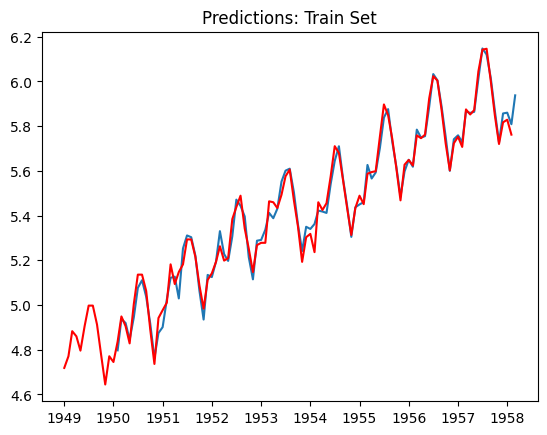

In [36]:
plt.plot(res.predict(start=13, end=len(df.Passengers[:110]), dynamic=False))
plt.plot(np.log(df.Passengers[:110]), color='red')
plt.title("Predictions: Train Set")

Text(0.5, 1.0, 'Predictions: Test Set')

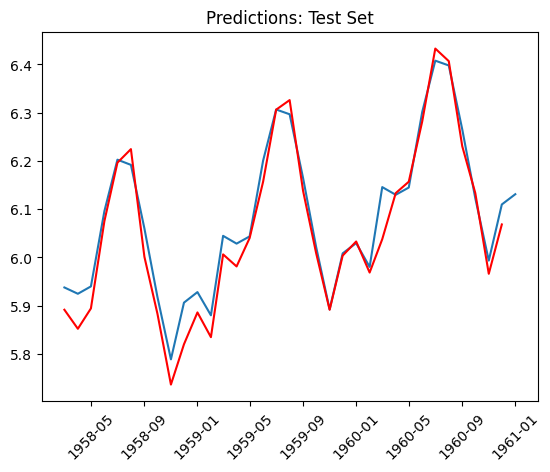

In [37]:
pred = res.predict(start=len(train_data), end=(len(df.Passengers)), dynamic=False)
plt.plot(pred)
plt.plot(np.log(df.Passengers[110:]),color='red')
plt.xticks(rotation=45)
plt.title("Predictions: Test Set")

(array([-4263., -4140., -4018., -3898., -3775., -3653., -3532., -3409.,
        -3287.]),
 [Text(-4263.0, 0, '1958-05'),
  Text(-4140.0, 0, '1958-09'),
  Text(-4018.0, 0, '1959-01'),
  Text(-3898.0, 0, '1959-05'),
  Text(-3775.0, 0, '1959-09'),
  Text(-3653.0, 0, '1960-01'),
  Text(-3532.0, 0, '1960-05'),
  Text(-3409.0, 0, '1960-09'),
  Text(-3287.0, 0, '1961-01')])

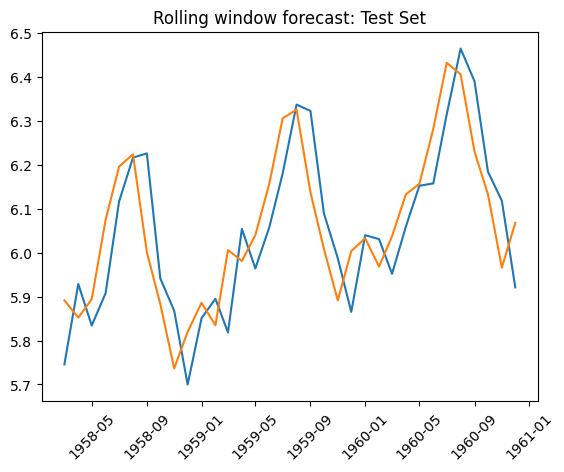

In [38]:
plt.plot(predictions)
plt.plot(test_data)
plt.title("Rolling window forecast: Test Set")
plt.xticks(rotation=45)